Homework 1 - Lia Yeghoyants

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot 
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
from scipy.stats import shapiro
from statsmodels import stats

In [2]:
data = pd.read_excel('Student_data.xlsx')

In [3]:
data.head()

,StudentID,school2,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,10


In [4]:
#Pasting data info here, which may be useful later, when I am working with the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StudentID    395 non-null    int64 
 1   school2      395 non-null    object
 2   sex          395 non-null    object
 3   age          395 non-null    int64 
 4   address      395 non-null    object
 5   famsize      395 non-null    object
 6   Pstatus      395 non-null    object
 7   Medu         395 non-null    int64 
 8   Fedu         395 non-null    int64 
 9   Mjob         395 non-null    object
 10  Fjob         395 non-null    object
 11  reason       395 non-null    object
 12  guardian     395 non-null    object
 13  traveltime   395 non-null    int64 
 14  studytime    395 non-null    int64 
 15  failures     395 non-null    int64 
 16  schoolsup    395 non-null    object
 17  famsup       395 non-null    object
 18  paid         395 non-null    object
 19  activities   395 non-null    

In [5]:
#Checking if there is a columns with no variance. Such column won't be useful
data.columns[data.nunique()==1]

Index([], dtype='object')

In [6]:
#Dropping the columns which I hypothesize won't have a significant/interesting affection on the Final Grade
data = data.drop(['StudentID','school2','address','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','traveltime'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sex          395 non-null    object
 1   age          395 non-null    int64 
 2   famsize      395 non-null    object
 3   reason       395 non-null    object
 4   studytime    395 non-null    int64 
 5   failures     395 non-null    int64 
 6   schoolsup    395 non-null    object
 7   famsup       395 non-null    object
 8   paid         395 non-null    object
 9   activities   395 non-null    object
 10  nursery      395 non-null    object
 11  higher       395 non-null    object
 12  internet     395 non-null    object
 13  romantic     395 non-null    object
 14  famrel       395 non-null    int64 
 15  freetime     395 non-null    int64 
 16  goout        395 non-null    int64 
 17  Dalc         395 non-null    int64 
 18  Walc         395 non-null    int64 
 19  health       395 non-null    

In [8]:
data.shape

(395, 22)

In [9]:
data_num=data.select_dtypes(exclude=['object'])
data_obj=data.select_dtypes(include=['object'])

In [10]:
print(data_num.shape)
print(data_obj.shape)

(395, 11)
(395, 11)


In [11]:
#To see the distribution of different variables.
data.describe()

,age,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sex          395 non-null    object
 1   age          395 non-null    int64 
 2   famsize      395 non-null    object
 3   reason       395 non-null    object
 4   studytime    395 non-null    int64 
 5   failures     395 non-null    int64 
 6   schoolsup    395 non-null    object
 7   famsup       395 non-null    object
 8   paid         395 non-null    object
 9   activities   395 non-null    object
 10  nursery      395 non-null    object
 11  higher       395 non-null    object
 12  internet     395 non-null    object
 13  romantic     395 non-null    object
 14  famrel       395 non-null    int64 
 15  freetime     395 non-null    int64 
 16  goout        395 non-null    int64 
 17  Dalc         395 non-null    int64 
 18  Walc         395 non-null    int64 
 19  health       395 non-null    

**Multicoloniality**

In [13]:
data_num.corr()

,age,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
age,1.000000,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.161579
studytime,-0.004140,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.097820
failures,0.243665,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.360415
famrel,0.053940,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.051363
freetime,0.016434,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.011307
goout,0.126964,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.132791
Dalc,0.131125,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.054660
Walc,0.117276,-0.253785,0.141962,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476,0.136291,-0.051939
health,-0.062187,-0.075616,0.065827,0.094056,0.075733,-0.009577,0.077180,0.092476,1.000000,-0.029937,-0.061335
absences,0.175230,-0.062700,0.063726,-0.044354,-0.058078,0.044302,0.111908,0.136291,-0.029937,1.000000,0.034247


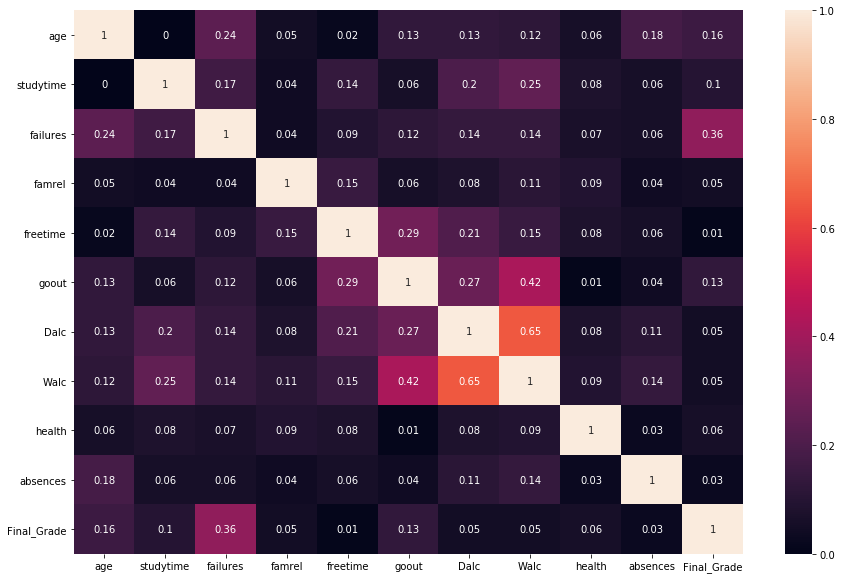

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(data_num.corr().abs().round(2),annot=True)
plt.show()

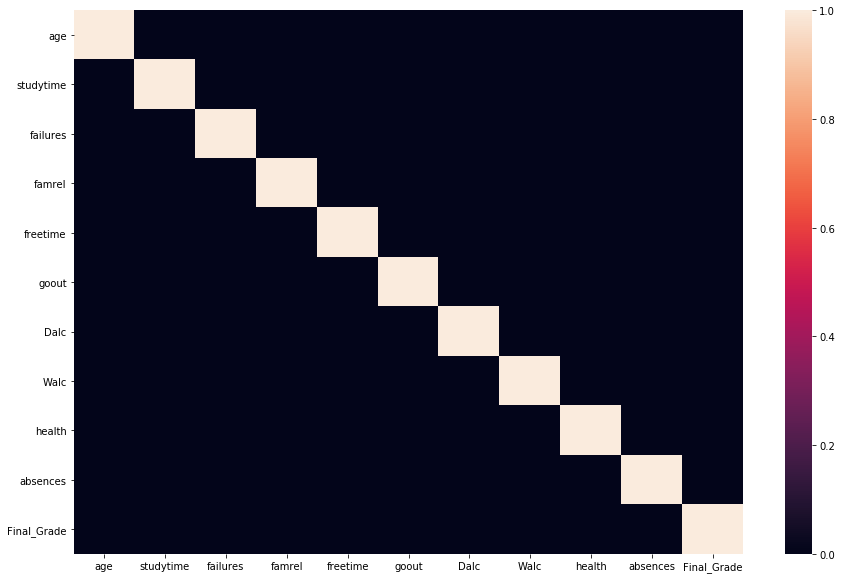

In [30]:
#Checking if I have any other correlations above or equal to 75% in absolute values
plt.figure(figsize = (15,10))
sns.heatmap(data_num.corr().abs()>=0.75)
plt.show()

# Building OLS Model

In [32]:
data_dummies = pd.get_dummies(data_obj,drop_first=True)
data_dummies.head()

,sex_M,famsize_LE3,reason_home,reason_other,reason_reputation,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,0,0,0,0,1,0,0,0,1,1,0,0
1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,0,1,0,1,0,1,0,1,0,1,1,1,0
3,0,0,1,0,0,0,1,1,1,1,1,1,1
4,0,0,1,0,0,0,1,1,0,1,1,0,0


In [33]:
#Merging all variables
data_model=data_num.join(data_dummies,how='left')
data_model.head()

,age,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,...,reason_other,reason_reputation,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,2,0,4,3,4,1,1,3,6,...,0,0,1,0,0,0,1,1,0,0
1,17,2,0,5,3,3,1,1,3,4,...,0,0,0,1,0,0,0,1,1,0
2,15,2,3,4,3,2,2,3,3,10,...,1,0,1,0,1,0,1,1,1,0
3,15,3,0,3,2,2,1,1,5,2,...,0,0,0,1,1,1,1,1,1,1
4,16,2,0,4,3,2,1,2,5,4,...,0,0,0,1,1,0,1,1,0,0


In [37]:
Y=data_model.Final_Grade
X=data_model.drop('Final_Grade',axis=1)
X=sm.add_constant(X)

In [40]:
# train-test split data
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [41]:
model_linear=sm.OLS(Y0,X0)
results=model_linear.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3.751
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           7.37e-08
Time:                        00:18:21   Log-Likelihood:                -824.30
No. Observations:                 296   AIC:                             1697.
Df Residuals:                     272   BIC:                             1785.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0842      4.291      2.816      0.005       3.636      20.533
age                  -0.3046      0.215     -1.415      0.158      -0.728       0.119
studytime             0.5616      0.333      1.685      0.093      -0.095       1.218
failures             -1.6184      0.360     -4.495      0.000      -2.327      -0.910
famrel                0.2276      0.285      0.797      0.426      -0.334       0.789
freetime              0.1810      0.262      0.691      0.490      -0.334       0.696
goout                -0.3939      0.260     -1.516      0.131      -0.905       0.118
Dalc                 -0.2723      0.359     -0.758      0.449      -0.980       0.435
Walc                  0.0410      0.275      0.149      0.882      -0.501       0.583
health               -0.0930      0.178     -0.521      0.603      -0.444       0.258
absences              0.0615      0.031      2.005      0.046       0.001       0.122
sex_M                 1.3340      0.576      2.317      0.021       0.201       2.467
famsize_LE3           0.5495      0.543      1.012      0.312      -0.519       1.618
reason_home          -0.1861      0.638     -0.292      0.771      -1.441       1.069
reason_other          1.3914      0.869      1.601      0.111      -0.320       3.103
reason_reputation     0.8344      0.649      1.286      0.199      -0.443       2.112
schoolsup_yes        -0.9073      0.725     -1.251      0.212      -2.335       0.520
famsup_yes           -1.0217      0.535     -1.908      0.057      -2.076       0.032
paid_yes              0.8618      0.543      1.588      0.113      -0.207       1.930
activities_yes       -0.7033      0.506     -1.390      0.166      -1.700       0.293
nursery_yes          -0.4460      0.621     -0.718      0.473      -1.668       0.776
higher_yes            2.5180      1.133      2.223      0.027       0.288       4.748
internet_yes          0.8134      0.680      1.197      0.232      -0.525       2.152
romantic_yes         -0.7025      0.530     -1.324      0.187      -1.747       0.342
==============================================================================
Omnibus:                       17.635   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.189
Skew:                          -0.571   Prob(JB):                     6.81e-05
Kurtosis:                       3.502   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
Y1_pred=results.predict(X1)
print('r2:', r2_score(Y1,Y1_pred))

r2: 0.15748507075771034


**Improving the model**

In [48]:
data_obj.head()

,sex,famsize,reason,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,F,GT3,course,yes,no,no,no,yes,yes,no,no
1,F,GT3,course,no,yes,no,no,no,yes,yes,no
2,F,LE3,other,yes,no,yes,no,yes,yes,yes,no
3,F,GT3,home,no,yes,yes,yes,yes,yes,yes,yes
4,F,GT3,home,no,yes,yes,no,yes,yes,no,no


In [49]:
data_num.head()

,age,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,18,2,0,4,3,4,1,1,3,6,6
1,17,2,0,5,3,3,1,1,3,4,6
2,15,2,3,4,3,2,2,3,3,10,10
3,15,3,0,3,2,2,1,1,5,2,15
4,16,2,0,4,3,2,1,2,5,4,10


In [25]:
variables=data_model.columns.tolist()

In [26]:
#Removing the target
variables.remove('Final_Grade')

In [27]:
formula='+'.join(variables)
formula='Final_Grade~'+formula
formula

'Final_Grade~age+studytime+failures+famrel+freetime+goout+Dalc+Walc+health+absences+sex_M+famsize_LE3+reason_home+reason_other+reason_reputation+schoolsup_yes+famsup_yes+paid_yes+activities_yes+nursery_yes+higher_yes+internet_yes+romantic_yes'

In [28]:
#Building the model
model_ols= ols(formula=formula,data=data_model)

In [29]:
results=model_ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     4.768
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           2.35e-11
Time:                        00:00:19   Log-Likelihood:                -1110.0
No. Observations:                 395   AIC:                             2268.
Df Residuals:                     371   BIC:                             2364.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.1685      3.724      3.536      0.000       5.846      20.491
age                  -0.3421      0.189     -1.814      0.071      -0.713       0.029
studytime             0.5054      0.281      1.798      0.073      -0.047       1.058
failures             -1.6790      0.313     -5.365      0.000      -2.294      -1.064
famrel                0.1619      0.244      0.665      0.507      -0.317       0.641
freetime              0.3060      0.233      1.316      0.189      -0.151       0.763
goout                -0.4764      0.220     -2.168      0.031      -0.909      -0.044
Dalc                 -0.2302      0.322     -0.715      0.475      -0.864       0.403
Walc                  0.0910      0.239      0.380      0.704      -0.379       0.561
health               -0.1395      0.158     -0.884      0.377      -0.450       0.171
absences              0.0577      0.028      2.062      0.040       0.003       0.113
sex_M                 1.2466      0.492      2.532      0.012       0.279       2.215
famsize_LE3           0.7182      0.473      1.519      0.130      -0.212       1.648
reason_home           0.2232      0.546      0.409      0.683      -0.850       1.296
reason_other          1.4704      0.800      1.838      0.067      -0.103       3.044
reason_reputation     0.8404      0.562      1.497      0.135      -0.264       1.945
schoolsup_yes        -1.3073      0.662     -1.974      0.049      -2.609      -0.005
famsup_yes           -0.6639      0.469     -1.417      0.157      -1.585       0.257
paid_yes              0.2941      0.473      0.622      0.534      -0.636       1.224
activities_yes       -0.4425      0.436     -1.016      0.310      -1.299       0.414
nursery_yes           0.0008      0.533      0.001      0.999      -1.047       1.049
higher_yes            1.9031      1.055      1.803      0.072      -0.172       3.978
internet_yes          0.7276      0.588      1.238      0.216      -0.428       1.883
romantic_yes         -0.9624      0.466     -2.066      0.040      -1.878      -0.046
==============================================================================
Omnibus:                       23.733   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.276
Skew:                          -0.608   Prob(JB):                     1.97e-06
Kurtosis:                       3.341   Cond. No.                         353.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""